### 4.10 Part 1.25 Mature New Customer
#### 1 - importing libraries
#### 2 - Importing df
#### 3 - Analyzing  by Frequent Flag
#### 4 - Analyzing Purshases by Income
#### 5 - Analyzing by Busiest_day
#### 6 - Analyzing number by State
#### 7 - Analyzing by n_dependants
#### 8 - Analyzing Days since prior order
#### 9 - Defining TOP products for client group

### 1 Importing libraries and df w/o PII

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

### 2 Importing df

In [3]:
df=pd.read_pickle(os.path.join(path,'Prepared Data','0MNC.pkl'))

In [4]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest days', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'median_days_sinse_ord', 'frequent_flag'],
      dtype='object')

In [5]:
df.shape

(2634070, 30)

In [6]:
df[['user_id','Age', 'income','product_id', 'order_number','mean_price']] .describe()

,user_id,Age,income,product_id,order_number,mean_price
count,2.634070e+06,2.634070e+06,2.634070e+06,2.634070e+06,2.634070e+06,2.634070e+06
mean,1.027700e+05,6.096731e+01,1.127707e+05,2.521599e+04,4.078968e+00,1.290427e+01
std,5.951499e+04,1.184712e+01,4.058394e+04,1.438365e+04,2.207688e+00,9.743712e+01
min,1.100000e+01,4.100000e+01,2.901800e+04,0.000000e+00,1.000000e+00,1.000000e+00
25%,5.147200e+04,5.100000e+01,9.348500e+04,1.317600e+04,2.000000e+00,7.319355e+00
50%,1.023080e+05,6.100000e+01,1.150720e+05,2.496400e+04,4.000000e+00,7.829661e+00
75%,1.547290e+05,7.100000e+01,1.424180e+05,3.771300e+04,6.000000e+00,8.326969e+00
max,2.062030e+05,8.100000e+01,5.907900e+05,4.968800e+04,1.000000e+01,7.414485e+03


### 3 -Analyzing MNC by Frequent Flag

#### --creating the subset to avoid Memory Error

In [7]:
df1=df[['user_id','fam_status','frequent_flag']]

In [8]:
df11=df1.drop_duplicates().reset_index()

In [9]:
df11

,index,user_id,fam_status,frequent_flag
0,0,26711,married,Regular customer
1,108,133128,married,Non-frequent customer
2,474,6965,divorced/widowed,Frequent customer
3,564,50000,married,Regular customer
4,590,55567,married,Regular customer
...,...,...,...,...
39102,4324579,188319,married,Non-frequent customer
39103,5634899,54446,married,Regular customer
39104,6328203,88667,married,Non-frequent customer
39105,6619413,168406,married,Non-frequent customer


#### -analyzing MNC by Frequent_flag and Family Status based on customers number

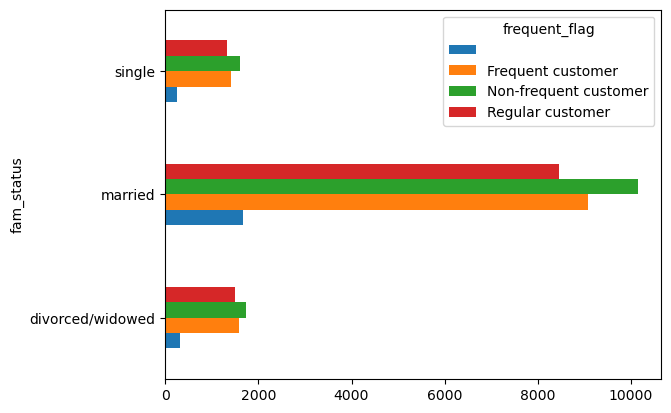

In [11]:
bar12=df11.groupby('fam_status')['frequent_flag'].value_counts().unstack().plot.barh()

In [12]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'MNC_LoyaltyFlag.png'))

In [13]:
df11.groupby('fam_status')['frequent_flag'].value_counts()

fam_status        frequent_flag        
divorced/widowed  Non-frequent customer     1736
                  Frequent customer         1591
                  Regular customer          1497
                                             311
married           Non-frequent customer    10153
                  Frequent customer         9086
                  Regular customer          8451
                                            1674
single            Non-frequent customer     1613
                  Frequent customer         1412
                  Regular customer          1326
                                             257
Name: frequent_flag, dtype: int64

### -analyzing MNC by Frequent flag and Family Status based on purchase number

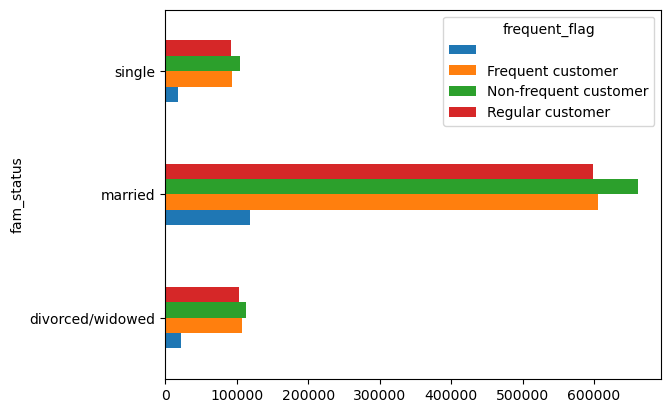

In [14]:
bar12=df1.groupby('fam_status')['frequent_flag'].value_counts().unstack().plot.barh()

In [15]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'MNC_LoyaltyFlagSales.png'))

In [16]:
df11.groupby('fam_status')['frequent_flag'].value_counts()

fam_status        frequent_flag        
divorced/widowed  Non-frequent customer     1736
                  Frequent customer         1591
                  Regular customer          1497
                                             311
married           Non-frequent customer    10153
                  Frequent customer         9086
                  Regular customer          8451
                                            1674
single            Non-frequent customer     1613
                  Frequent customer         1412
                  Regular customer          1326
                                             257
Name: frequent_flag, dtype: int64

### 4 -analyzing MNC purshases by their income

In [17]:
df2=df[['prices', 'income']]

In [18]:
df2['prices'].sum()

33507597.10000002

In [19]:
df22=df2.groupby('income').agg(mean_purshase=('prices','mean'))

In [20]:
df22

,mean_purshase
income,
29018,6.437500
29044,6.877027
29053,6.535556
29074,5.866667
29081,6.680952
...,...
531126,716.997619
544515,459.539394
558033,240.364063


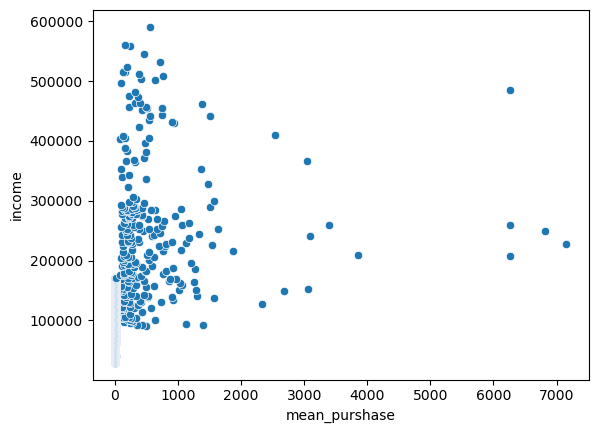

In [21]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22)

#### filter extrem big values

In [22]:
df22filtered=df22[df22['mean_purshase']<4000]

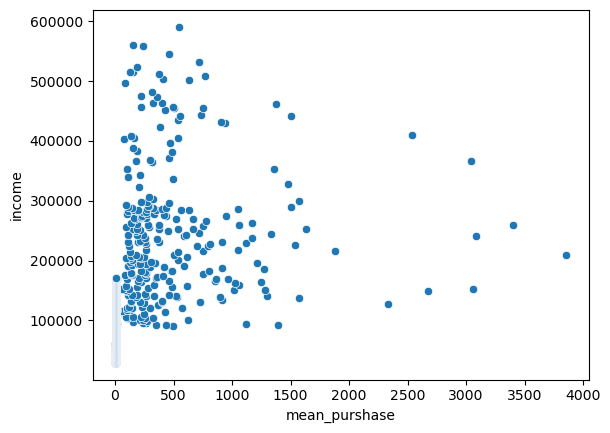

In [23]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22filtered)

In [24]:
scat3.figure.savefig(os.path.join(path, 'Prepared Data', 'MNC_PricesIncome.png'))

### 5 - Analyzing MNC by Busiest_day

In [25]:
df4=df[['user_id','STATE', 'busiest_day', 'day_of_week']]

In [26]:
df4

,user_id,STATE,busiest_day,day_of_week
0,26711,Missouri,Regularly days,5
1,26711,Missouri,Busiest days,1
2,26711,Missouri,Regularly days,2
3,26711,Missouri,Regularly days,2
108,133128,Kentucky,Regularly days,6
...,...,...,...,...
6464349,135902,Missouri,Regularly days,5
6464350,135902,Missouri,Regularly days,6
6464351,135902,Missouri,Busiest days,0
6464352,135902,Missouri,Regularly days,6


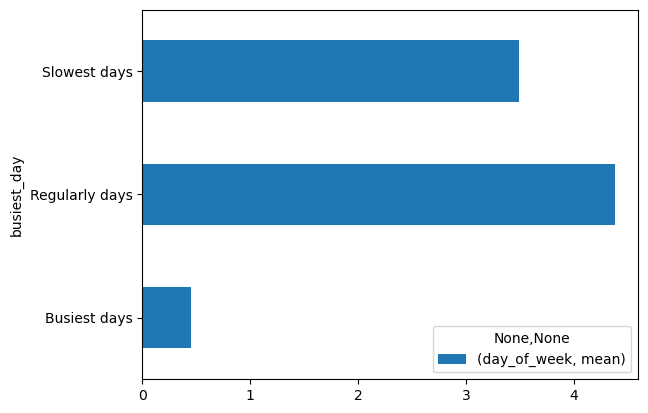

In [27]:
bar14=df4.groupby('busiest_day').agg({'day_of_week':['mean']}).plot.barh()

In [28]:
bar14.figure.savefig(os.path.join(path, 'Prepared Data', 'MNC_BusiestDayOfWeek.png'))

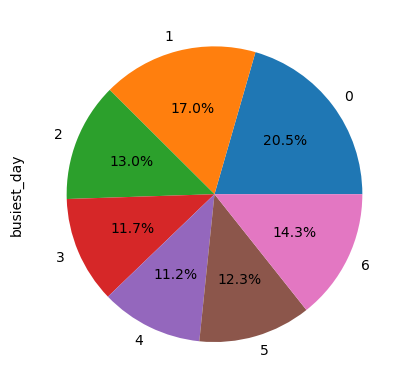

In [29]:
pie24=df4.groupby('day_of_week')['busiest_day'].count().plot(kind='pie', autopct='%0.01f%%')

In [30]:
df4.groupby('day_of_week')['busiest_day'].count()

day_of_week
0    540800
1    448068
2    341862
3    307347
4    294288
5    324501
6    377204
Name: busiest_day, dtype: int64

In [31]:
pie24.figure.savefig(os.path.join(path, 'Prepared Data', 'MNC_pieBusiestDayOfWeek.png'))

### -MNC prefered hour of day

In [32]:
df44=df[['order_hour_of_day','user_id']]

In [33]:
df44.groupby('order_hour_of_day')['user_id'].count()

order_hour_of_day
0      18811
1      11146
2       6636
3       5054
4       4365
5       6460
6      18475
7      55757
8     113025
9     172847
10    209160
11    219763
12    219213
13    224038
14    224780
15    225740
16    221956
17    188114
18    149757
19    112279
20     81723
21     61035
22     49762
23     34174
Name: user_id, dtype: int64

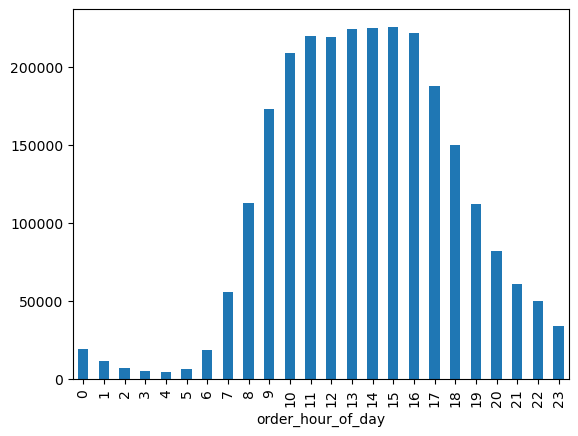

In [34]:
bar44=df44.groupby('order_hour_of_day')['user_id'].count().plot.bar()

In [35]:
bar44.figure.savefig(os.path.join(path, 'Prepared Data', 'MNC_BusiestHourOfDay.png'))

### 6 - Analyzing number of MNC by State

In [36]:
df5=df[['user_id','STATE']]

In [37]:
DF5=df5.drop_duplicates().reset_index()

In [38]:
DF5

,index,user_id,STATE
0,0,26711,Missouri
1,108,133128,Kentucky
2,474,6965,North Dakota
3,564,50000,Maine
4,590,55567,North Carolina
...,...,...,...
39102,4324579,188319,New York
39103,5634899,54446,North Dakota
39104,6328203,88667,North Dakota
39105,6619413,168406,Arkansas


#### number of rows indicate total number of YNC =39107

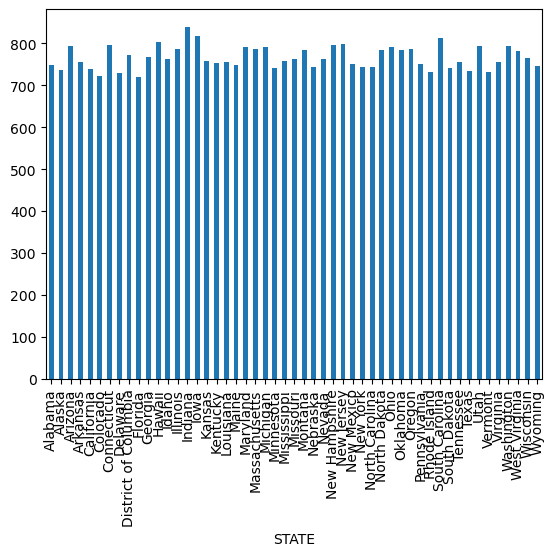

In [39]:
bar15=DF5.groupby('STATE')['user_id'].count().plot.bar()

In [40]:
DF5.groupby('STATE')['user_id'].count()

STATE
Alabama                 748
Alaska                  736
Arizona                 795
Arkansas                756
California              739
Colorado                722
Connecticut             797
Delaware                730
District of Columbia    772
Florida                 719
Georgia                 767
Hawaii                  803
Idaho                   764
Illinois                786
Indiana                 840
Iowa                    819
Kansas                  758
Kentucky                753
Louisiana               755
Maine                   748
Maryland                791
Massachusetts           788
Michigan                791
Minnesota               741
Mississippi             759
Missouri                763
Montana                 784
Nebraska                743
Nevada                  762
New Hampshire           796
New Jersey              799
New Mexico              751
New York                745
North Carolina          745
North Dakota            784
Ohio          

#### -defining 10 Top States

In [41]:
DF5.groupby('STATE')['user_id'].count().sort_values(ascending=False).head(10)

STATE
Indiana           840
Iowa              819
South Carolina    813
Hawaii            803
New Jersey        799
Connecticut       797
New Hampshire     796
Arizona           795
Utah              794
Washington        794
Name: user_id, dtype: int64

#### -saving the plot

In [42]:
bar15.figure.savefig(os.path.join(path, 'Prepared Data', 'MNC_UsersNumberState.png'))

### 7 - Analyzing MNC by n_dependants

In [43]:
df6=df[['user_id', 'n_dependants']]

In [44]:
DF6=df6.drop_duplicates()

In [45]:
DF6.groupby(['n_dependants'])['user_id'].count()

n_dependants
0    9743
1    9898
2    9719
3    9747
Name: user_id, dtype: int64

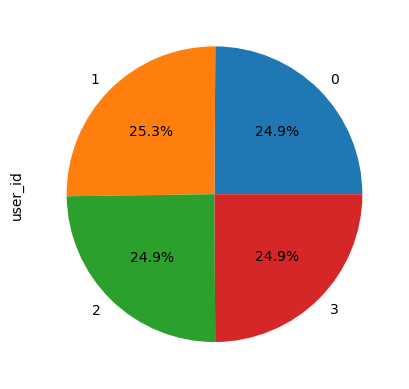

In [46]:
pie16=DF6.groupby(['n_dependants'])['user_id'].count().plot(kind='pie', autopct='%0.01f%%')

In [47]:
DF6

,user_id,n_dependants
0,26711,3
108,133128,2
474,6965,0
564,50000,2
590,55567,2
...,...,...
4324579,188319,1
5634899,54446,1
6328203,88667,3
6619413,168406,2


#### saving the plot

In [48]:
pie16.figure.savefig(os.path.join(path, 'Prepared Data', 'MNC_NDependansUsers.png'))

### 8 - Analyzing MNC Days since prior order

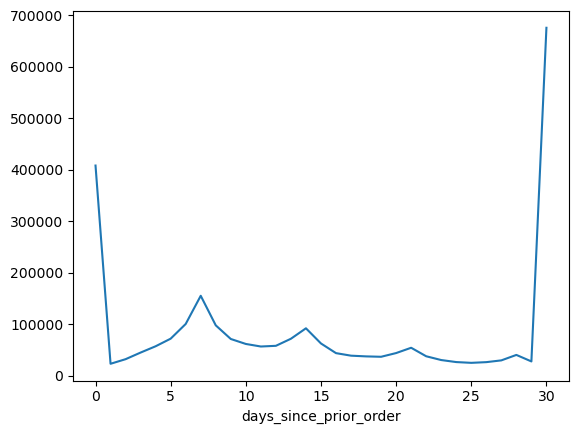

In [49]:
line17=df.groupby('days_since_prior_order')['days_since_prior_order'].count().plot(kind='line')

In [51]:
df.groupby('days_since_prior_order')['days_since_prior_order'].count()

days_since_prior_order
0     408170
1      22927
2      31865
3      44737
4      56973
5      71741
6     100302
7     155083
8      97622
9      71121
10     61460
11     56496
12     57833
13     71575
14     91879
15     62402
16     43613
17     38684
18     37291
19     36538
20     43763
21     54061
22     37539
23     30189
24     26253
25     24755
26     26112
27     29541
28     40149
29     27503
30    675893
Name: days_since_prior_order, dtype: int64

In [52]:
line17.figure.savefig(os.path.join(path, 'Prepared Data', 'MNC_DaysSincePriorOrder.png'))

### 9- Defining MNC TOP products for client group


 #### creating subset

In [53]:
df18=df[['product_name','product_id','prices']]

In [54]:
df18

,product_name,product_id,prices
0,Soda,196,9.0
1,Clementines,6184,4.3
2,0% Greek Strained Yogurt,38928,12.6
3,,0,0.0
108,Butter Pecan Ice Cream,1774,14.8
...,...,...,...
6464349,Chicken Carbonara,32019,13.2
6464350,Wild Blueberry Muffin & Quick Bread Mix,44678,12.1
6464351,Fresh Mint Toothpaste,44801,1.5
6464352,Favorites Super Moist Butter Recipe Yellow Cak...,47115,8.6


#### identifying the most populare products counting orders rows  and selecting 10 TOP 

In [55]:
DF18=df18.groupby('product_name')['prices'].count().sort_values( ascending=False).reset_index().head(10)

In [56]:
DF18

,product_name,prices
0,,41458
1,Banana,35265
2,Bag of Organic Bananas,24015
3,Organic Baby Spinach,18027
4,Organic Strawberries,16449
5,Organic Avocado,14972
6,Large Lemon,12945
7,Organic Hass Avocado,12862
8,Strawberries,11950
9,Limes,10969


In [57]:
DF18=DF18.rename(columns={'prices':'count_orders'})

In [58]:
DF18=DF18.drop(index=5)

In [59]:
DF18


,product_name,count_orders
0,,41458
1,Banana,35265
2,Bag of Organic Bananas,24015
3,Organic Baby Spinach,18027
4,Organic Strawberries,16449
6,Large Lemon,12945
7,Organic Hass Avocado,12862
8,Strawberries,11950
9,Limes,10969


#### -creating plot

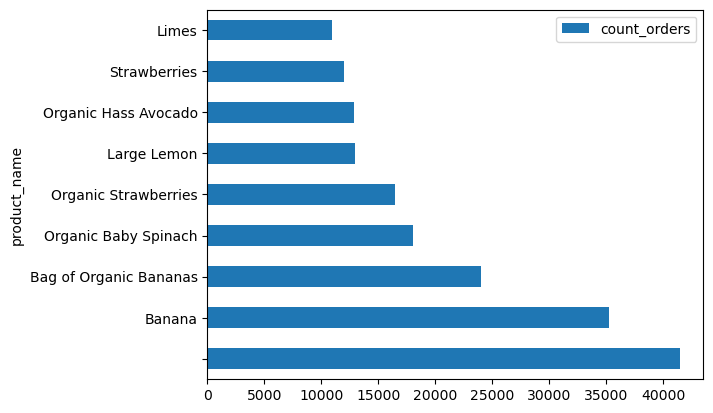

In [60]:
Bar21=DF18.plot.barh(x='product_name')

#### -saving the plot

In [61]:
Bar21.figure.savefig(os.path.join(path, 'Prepared Data', 'MNC_Products.png'))